In [1]:
import numpy as np
import pandas as pd

#import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#для более четкого отображения графиков, векторный формат
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

#параметры графика
#from pylab import rcParams
#plt.style.use('ggplot')

import seaborn as sns; sns.set()

from scipy.stats import chisquare, chi2, chi2_contingency

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

In [2]:
# Пути к директориям и файлам
path_name_test = "test_tut.csv"
path_name_train = "train_tut.csv"

# Загружаем данные в датафреймы
df_test = pd.read_csv(path_name_test)
df = pd.read_csv(path_name_train)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [5]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


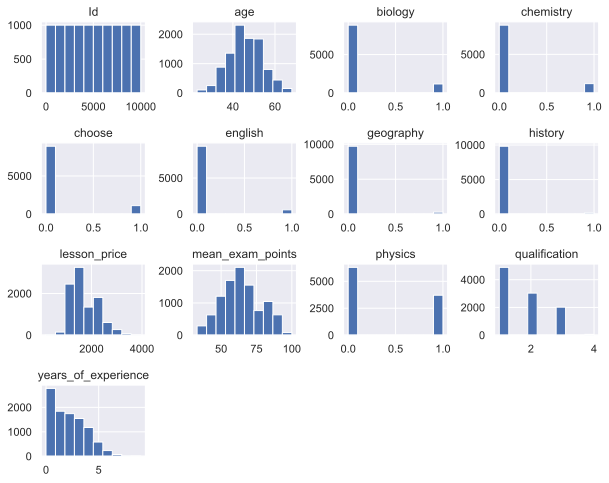

In [6]:
# Построим гистограммы параметров
df.hist(bins=10, figsize=(10,8))
plt.subplots_adjust(wspace=0.45,hspace=0.7)
plt.show()

In [7]:
# Расчитаем корреляционную матрицу
corr_matrix = df.corr()
# Смотрим значения коэффициентов корреляции 
corr_matrix["choose"].sort_values(ascending=False)

choose                 1.000000
physics                0.195183
mean_exam_points       0.109409
chemistry              0.091878
biology                0.071310
qualification          0.042160
years_of_experience    0.029010
english                0.022227
age                    0.017165
Id                     0.012043
geography              0.006366
history               -0.004700
lesson_price          -0.134013
Name: choose, dtype: float64

In [8]:
# Обработка выбросов

# Определение выбросов
def indicies_of_outliers(x):
    """Возвращает индекс выбросов, используя межквартильный размах
    """
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound)|(x < lower_bound))

In [9]:
# Используя функцию определяем, в каких колонках есть выбросы
for cat_colname in df.select_dtypes(include='float64').columns:
    print(f"{cat_colname}: \n {indicies_of_outliers(df[cat_colname])}\n")

age: 
 (array([  89,  144,  251,  614,  616,  777,  945, 1000, 1517, 1601, 1684,
       1754, 1884, 1911, 2035, 2055, 2375, 2460, 2512, 2551, 2652, 2717,
       2718, 3213, 3278, 3489, 3622, 4016, 4219, 4456, 4563, 4618, 5117,
       5145, 5263, 5953, 6017, 6107, 6231, 6313, 6560, 6590, 6884, 7047,
       7052, 7331, 7494, 7627, 8130, 8445, 8475, 8966, 9288, 9309, 9359,
       9385, 9413, 9535, 9623], dtype=int64),)

years_of_experience: 
 (array([ 616, 1427, 2410, 2507, 2600, 2885, 3383, 3390, 3427, 3439, 3536,
       3578, 3705, 4384, 4680, 4706, 4958, 4966, 5079, 6419, 6477, 6669,
       6884, 8130, 8358, 8529, 8541, 8563, 8637, 9355, 9973], dtype=int64),)

lesson_price: 
 (array([ 132,  157,  190,  865, 1003, 1087, 1432, 1863, 1934, 2240, 2277,
       2522, 2584, 2730, 3327, 3440, 4818, 5680, 5944, 7585, 8130, 8637,
       9015, 9207, 9933], dtype=int64),)

qualification: 
 (array([  99,  350,  499,  698, 1158, 1168, 1519, 1592, 1613, 2131, 2178,
       2210, 2273, 2328, 2953, 2956

In [10]:
# # Заменим значения выбросов на медиану
# for cat_colname in df.select_dtypes(include='float64').columns:
#     for array_of_index in indicies_of_outliers(df[cat_colname]):
#         for i in array_of_index:
#             df.loc[df[cat_colname] == df[cat_colname][i], cat_colname] = df[cat_colname].median()

In [11]:
# Расчитаем корреляционную матрицу
corr_matrix = df.corr()
# Смотрим значения коэффициентов корреляции 
corr_matrix["choose"].sort_values(ascending=False)

choose                 1.000000
physics                0.195183
mean_exam_points       0.109409
chemistry              0.091878
biology                0.071310
qualification          0.042160
years_of_experience    0.029010
english                0.022227
age                    0.017165
Id                     0.012043
geography              0.006366
history               -0.004700
lesson_price          -0.134013
Name: choose, dtype: float64

In [12]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [13]:
# Проценты пропусков

def show_me_empties(df):
    """ Проценты пропусков признаков в dataframe
    """
    count = 0
    for i in df:
        pct_missing = np.mean(df[i].isnull())
        if pct_missing != 0:
            print(f"{i} - {round(pct_missing*100,2)}%")
            count += 1
    return count


In [14]:
if show_me_empties(df) == 0:
    print(f"Нет попусков")

Нет попусков


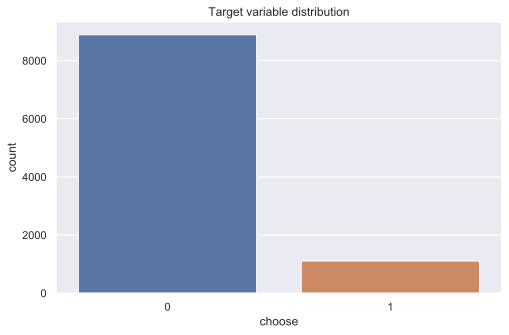

In [15]:
plt.figure(figsize=(8, 5))

sns.countplot(x='choose', data=df)

plt.title('Target variable distribution')
plt.show()

In [16]:
# Расчитаем корреляционную матрицу
corr_matrix = df.corr()
# Смотрим значения коэффициентов корреляции 
corr_matrix["choose"].sort_values(ascending=False)

choose                 1.000000
physics                0.195183
mean_exam_points       0.109409
chemistry              0.091878
biology                0.071310
qualification          0.042160
years_of_experience    0.029010
english                0.022227
age                    0.017165
Id                     0.012043
geography              0.006366
history               -0.004700
lesson_price          -0.134013
Name: choose, dtype: float64

In [17]:
NUM_FEATURE_NAMES = ["physics","mean_exam_points", "lesson_price"]

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [19]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    #print(pd.crosstab(y_test_true, y_test_pred))

In [20]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [21]:
#Нормализация данных
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

In [22]:
#Нормализация данных
scaler_test = StandardScaler()

df_norm_test = df_test.copy()
df_norm_test[NUM_FEATURE_NAMES] = scaler_test.fit_transform(df_norm_test[NUM_FEATURE_NAMES])

df_test = df_norm_test.copy()

In [23]:
TARGET_NAME = 'choose'

In [24]:
# Разбиение на train и test
X = df[NUM_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [25]:
# Балансировка целевой переменной
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    6218
1    5474
Name: choose, dtype: int64

In [26]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [27]:
# CatBoost
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      6218
           1       0.78      0.82      0.80      5474

    accuracy                           0.81     11692
   macro avg       0.81      0.81      0.81     11692
weighted avg       0.81      0.81      0.81     11692

TEST

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2673
           1       0.26      0.64      0.37       327

    accuracy                           0.77      3000
   macro avg       0.60      0.71      0.61      3000
weighted avg       0.87      0.77      0.80      3000

CONFUSION MATRIX



In [28]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)

In [29]:
params = {'n_estimators':[50, 100, 300, 600, 1000, 1300],
          'max_depth':[3, 5, 8]}

In [30]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [31]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 38.1 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002D581DAFF88>,
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 8],
                                        'n_estimators': [50, 100, 300, 600,
                                                         1000, 1300]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [32]:
rs.best_params_

{'n_estimators': 100, 'max_depth': 5}

In [33]:
rs.best_score_

0.42274342541026094

In [34]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      6218
           1       0.75      0.77      0.76      5474

    accuracy                           0.77     11692
   macro avg       0.77      0.77      0.77     11692
weighted avg       0.77      0.77      0.77     11692

TEST

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2673
           1       0.27      0.69      0.39       327

    accuracy                           0.77      3000
   macro avg       0.61      0.73      0.62      3000
weighted avg       0.88      0.77      0.80      3000

CONFUSION MATRIX

Wall time: 1.77 s


In [35]:
final_model = catb.CatBoostClassifier(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                      l2_leaf_reg=10,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      6218
           1       0.73      0.75      0.74      5474

    accuracy                           0.75     11692
   macro avg       0.75      0.75      0.75     11692
weighted avg       0.75      0.75      0.75     11692

TEST

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      2673
           1       0.27      0.71      0.39       327

    accuracy                           0.76      3000
   macro avg       0.61      0.73      0.62      3000
weighted avg       0.88      0.76      0.80      3000

CONFUSION MATRIX



In [36]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [37]:
final_model = catb.CatBoostClassifier(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                      class_weights=[1, 3.5],
                                      silent=True, random_state=21)

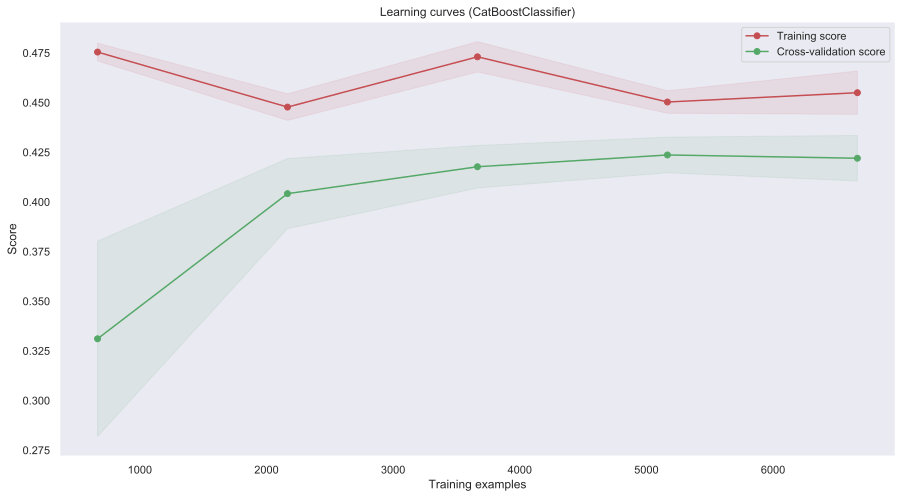

In [38]:
show_learning_curve_plot(final_model, X, y)

In [39]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


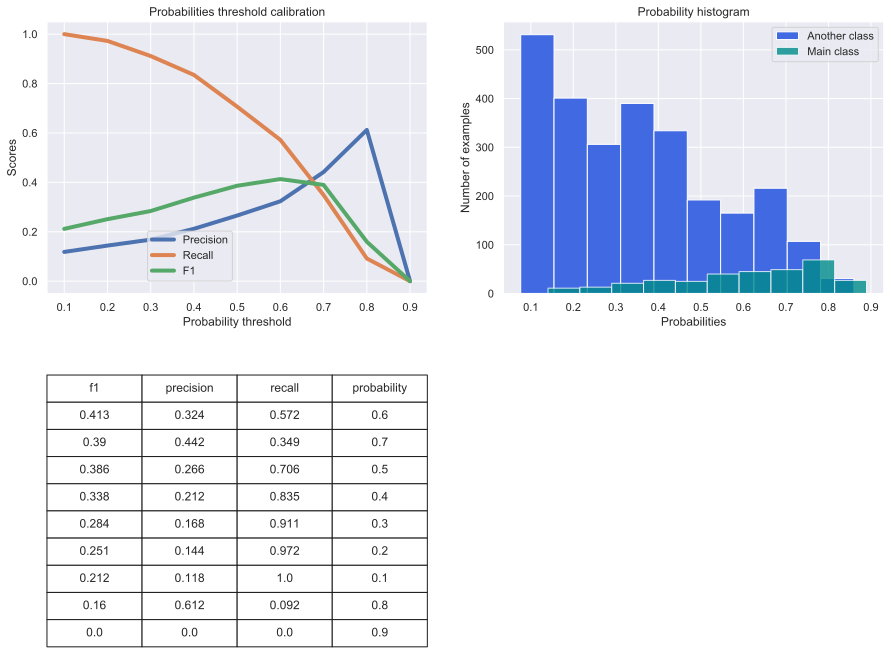

In [40]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

In [41]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

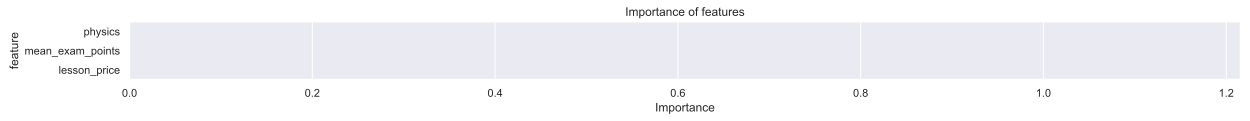

In [42]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=15)

In [43]:
important_features_top

['physics', 'mean_exam_points', 'lesson_price']

In [44]:
final_model = catb.CatBoostClassifier(n_estimators=rs.best_params_["n_estimators"], max_depth=rs.best_params_["max_depth"],
                                      l2_leaf_reg=10,
                                      silent=True, random_state=21)
final_model.fit(X_train[important_features_top], y_train)

y_train_pred = final_model.predict(X_train[important_features_top])
y_test_pred = final_model.predict(X_test[important_features_top])
y_test_pred_probs = final_model.predict_proba(X_test[important_features_top])

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      6218
           1       0.73      0.75      0.74      5474

    accuracy                           0.75     11692
   macro avg       0.75      0.75      0.75     11692
weighted avg       0.75      0.75      0.75     11692

TEST

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      2673
           1       0.27      0.71      0.39       327

    accuracy                           0.76      3000
   macro avg       0.61      0.73      0.62      3000
weighted avg       0.88      0.76      0.80      3000

CONFUSION MATRIX



In [45]:

y_test_pred_test = final_model.predict(df_test[important_features_top])
#y_test_pred_probs_test = final_model.predict_proba(df_test[important_features_top])

In [46]:
#записываем модельные данные файл
#np.savetxt("VYPolishchuk_predictions_kaggle.csv", y_test_pred_test, delimiter=",", encoding='utf-8', header='choose')

In [50]:
#генерируем порядковые номера
id_df = [i for i in range(10000,20000)]

#создаем датафрейм для записи в результирующий файл
df_csv = pd.DataFrame({'Id': id_df,'choose': y_test_pred_test})

#записываем модельные данные файл
df_csv.to_csv(r"VYPolishchuk_predictions_kaggle.csv", index=False, encoding='utf-8')